VotingClassifierModel Train Score is :  0.963254593175853
VotingClassifierModel Test Score is :  0.9627659574468085
----------------------------------------------------
Predicted Value for VotingClassifierModel is :  [0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1
 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0
 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0
 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1
 1 1 0]
Confusion Matrix is : 
 [[ 62   6]
 [  1 119]]


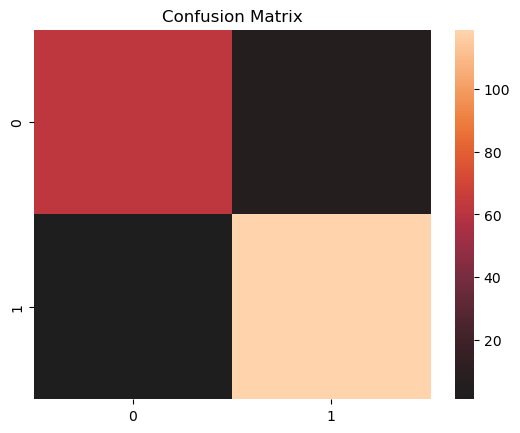

In [11]:
# Import Libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load breast cancer data
BreastData = load_breast_cancer()

# x Data, y Data
x = BreastData.data
y = BreastData.target

# Splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=44, shuffle=True)

# Applying VotingClassifier Model
DTModel_ = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=33)
LDAModel_ = LinearDiscriminantAnalysis(n_components=1, solver='svd')
SGDModel_ = SGDClassifier(loss='log', penalty='l2', max_iter=10000, tol=1e-5)

# Loading Voting Classifier
VotingClassifierModel = VotingClassifier(estimators=[('DTModel', DTModel_), ('LDAModel', LDAModel_), ('SGDModel', SGDModel_)], voting='hard')
VotingClassifierModel.fit(x_train, y_train)

# Calculating Details
print('VotingClassifierModel Train Score is : ', VotingClassifierModel.score(x_train, y_train))
print('VotingClassifierModel Test Score is : ', VotingClassifierModel.score(x_test, y_test))
print('----------------------------------------------------')

# Calculating Prediction
y_pred = VotingClassifierModel.predict(x_test)
print('Predicted Value for VotingClassifierModel is : ', y_pred[:10])

# Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# Drawing confusion matrix
sns.heatmap(CM, center=True)
plt.title('Confusion Matrix')
plt.show()
